In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import shapiro

# markettime, market_money and market_file with "," as sep
dt_market_file = pd.read_csv('market_file.csv', sep=',', encoding='utf-8')
dt_market_money = pd.read_csv('market_money.csv', sep=',', encoding='utf-8')
dt_market_time = pd.read_csv('market_time.csv', sep=',', encoding='utf-8')

In [243]:
# money and forecast_chan with ";" as sep also forecast_chan with another encoding
dt_money = pd.read_csv('money.csv', sep=';', encoding='utf-8', decimal=',')
dt_forecast_chan = pd.read_csv('forecast_chan.csv', sep=';', decimal=',', encoding='cp1251')


In [244]:
# every column refactor to pep8
dt_market_file.columns = list(map(lambda x: x.lower().replace(' ', '_'), dt_market_file.columns))
dt_market_money.columns = list(map(lambda x: x.lower().replace(' ', '_'), dt_market_money.columns))
dt_market_time.columns = list(map(lambda x: x.lower().replace(' ', '_'), dt_market_time.columns))
dt_money.columns = list(map(lambda x: x.lower().replace(' ', '_'), dt_money))
# changed стандартт  to "стандарт" and "Косметика и аксесуары" to "Косметика и аксессуары" and "предыдущий"
dt_market_file['тип_сервиса'] = dt_market_file['тип_сервиса'].replace("стандартт", 'стандарт')
dt_market_file['популярная_категория'] = dt_market_file['популярная_категория'].replace("Косметика и аксесуары",
                                                                                        "Косметика и аксессуары")
dt_market_time['период'] = dt_market_time['период'].replace("предыдцщий_месяц", 'предыдущий_месяц')

In [245]:
dat1 = pd.merge(dt_forecast_chan, dt_market_file, on=['id'], how='outer')
dat2 = pd.merge(dt_money, dat1, on=['id'], how='outer')
prepre = []  # препредыдущий
pred = []  # предыдущий
tek = []  # текущий

for name, group in dt_market_money.groupby('id'):
    w = list(group['выручка'])
    prepre.append(w[0])
    pred.append(w[1])
    tek.append(w[2])

#dat3 = pd.DataFrame(col)
#print(dat3)# merged all csv files that we had


dat2['выручка_препредыдущий_месяц'] = prepre
dat2['выручка_предыдущий_месяц'] = pred
dat2['выручка_текущий_месяц'] = tek
pre = []
teku = []
for name, group in dt_market_time.groupby('id'):
    w = list(group['минут'])
    pre.append(w[0])
    teku.append(w[1])
dat2['минут_текущий'] = teku
dat2['минут_предыдущий'] = pre


In [246]:
dat2


,id,прибыль,вероятность,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_текущий,минут_предыдущий
0,215348,0.98,NaN,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,3293.1,0.0,13,14
1,215349,4.16,1.00,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,12,10
2,215350,3.13,0.12,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,8,13
3,215351,4.87,0.97,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,11,13
4,215352,4.21,0.90,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,4.44,0.25,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4704.0,3664.0,4741.7,7,14
1296,216644,6.11,0.00,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5353.0,5299.0,11,12
1297,216645,3.29,0.12,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5139.2,5334.0,18,12
1298,216646,4.03,0.00,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,5224.6,4725.0,4923.0,7,18


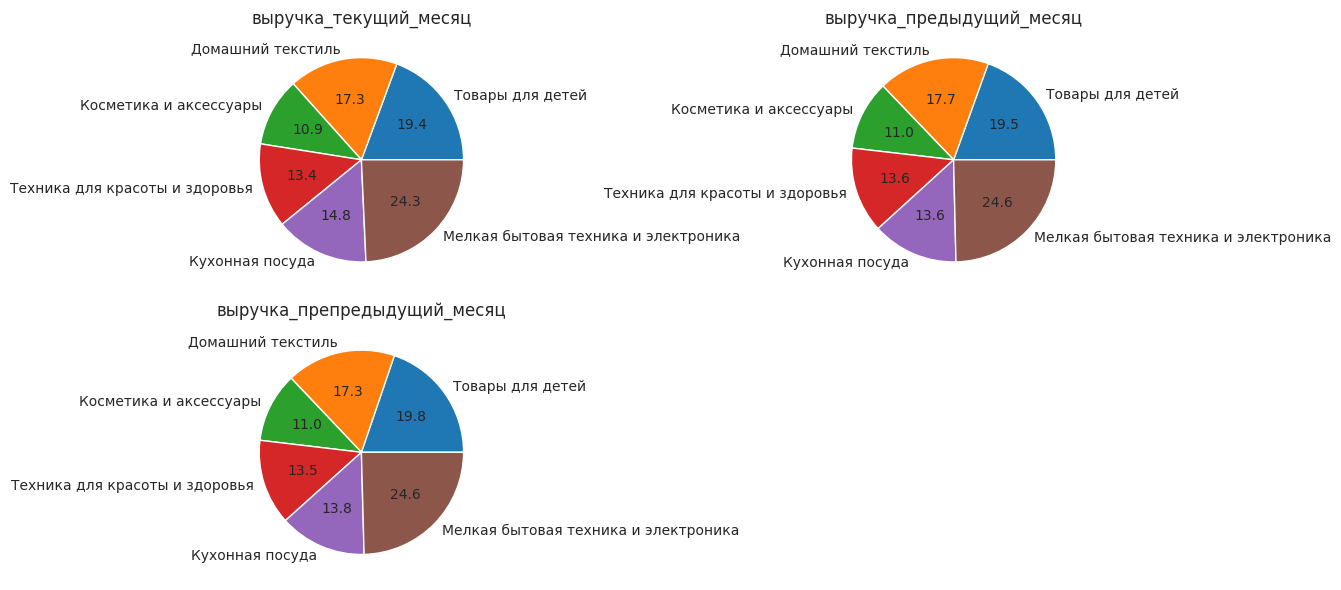

In [247]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0][0].pie(dat2.groupby(['популярная_категория'])[['выручка_текущий_месяц']].sum()['выручка_текущий_месяц'],
               autopct='%1.1f',
               labels=dat2['популярная_категория'].unique())
axes[0][0].set_title('выручка_текущий_месяц')
axes[0][1].pie(dat2.groupby(['популярная_категория'])[['выручка_предыдущий_месяц']].sum()['выручка_предыдущий_месяц'],
               autopct='%1.1f',
               labels=dat2['популярная_категория'].unique())
axes[0][1].set_title('выручка_предыдущий_месяц')
axes[1][0].pie(
    dat2.groupby(['популярная_категория'])[['выручка_препредыдущий_месяц']].sum()['выручка_препредыдущий_месяц'],
    autopct='%1.1f',
    labels=dat2['популярная_категория'].unique())
axes[1][0].set_title('выручка_препредыдущий_месяц')
fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

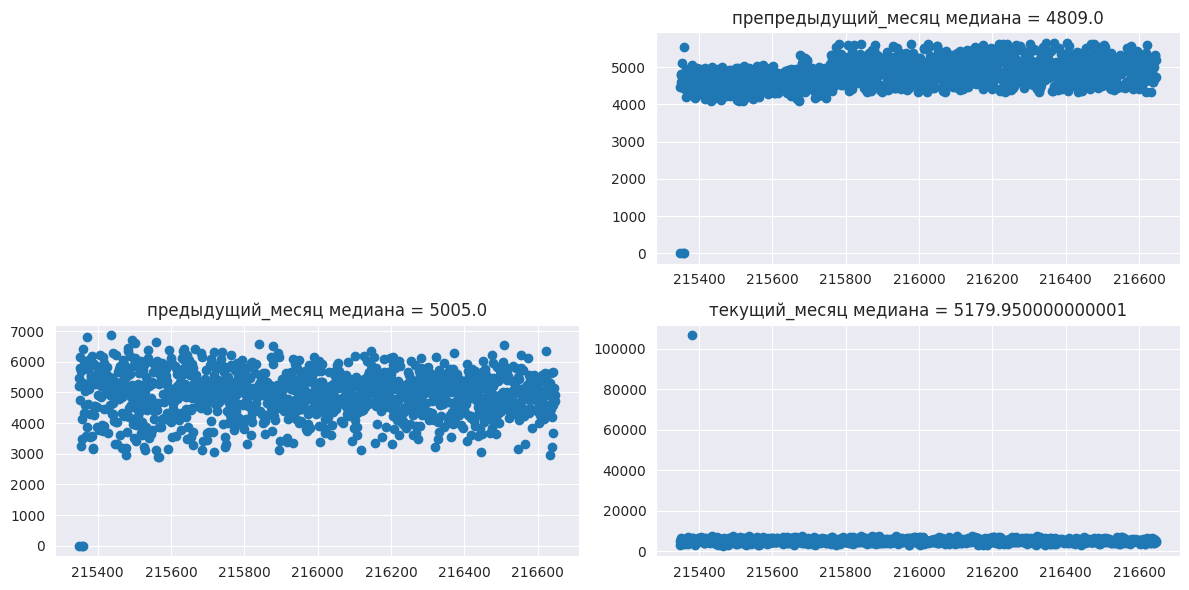

In [248]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

kek = dt_market_money[dt_market_money['период'] == 'препредыдущий_месяц']
axes[0][1].scatter(kek['id'].values, kek['выручка'])
k = kek['выручка'].median()
axes[0][1].set_title(f'препредыдущий_месяц медиана = {k}')
kek = dt_market_money[dt_market_money['период'] == 'предыдущий_месяц']
axes[1][0].scatter(kek['id'].values, kek['выручка'])
k = kek['выручка'].median()
axes[1][0].set_title(f'предыдущий_месяц медиана = {k}')
kek = dt_market_money[dt_market_money['период'] == 'текущий_месяц']
k = kek['выручка'].median()
axes[1][1].scatter(kek['id'].values, kek['выручка'])
axes[1][1].set_title(f'текущий_месяц медиана = {k}')
fig.delaxes(axes[0, 0])
plt.tight_layout()
plt.show()

In [249]:
dat2.groupby('популярная_категория').sum()[
    ['выручка_текущий_месяц', 'выручка_предыдущий_месяц',
     'выручка_препредыдущий_месяц']]  # sum of revenue that came from different categories

,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц
популярная_категория,,,
Домашний текстиль,1279759.2,1264264.0,1287621.7
Косметика и аксессуары,1140267.0,1144539.0,1127034.7
Кухонная посуда,718111.0,713144.3,719331.5
Мелкая бытовая техника и электроника,883330.7,881102.5,880524.1
Техника для красоты и здоровья,980740.9,882340.6,896852.7
Товары для детей,1604227.0,1596424.4,1600599.3


In [250]:
# plotting the boxplot and the histogram  to check whether the data is normal 
def plotplot(name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    k = dat2[name]
    plt.figure(figsize=(8, 6))
    axes[0].boxplot(k)
    axes[0].set_title('Boxplot of выручка_предыдущий_месяц')
    axes[1].hist(k, bins=20)
    plt.show()


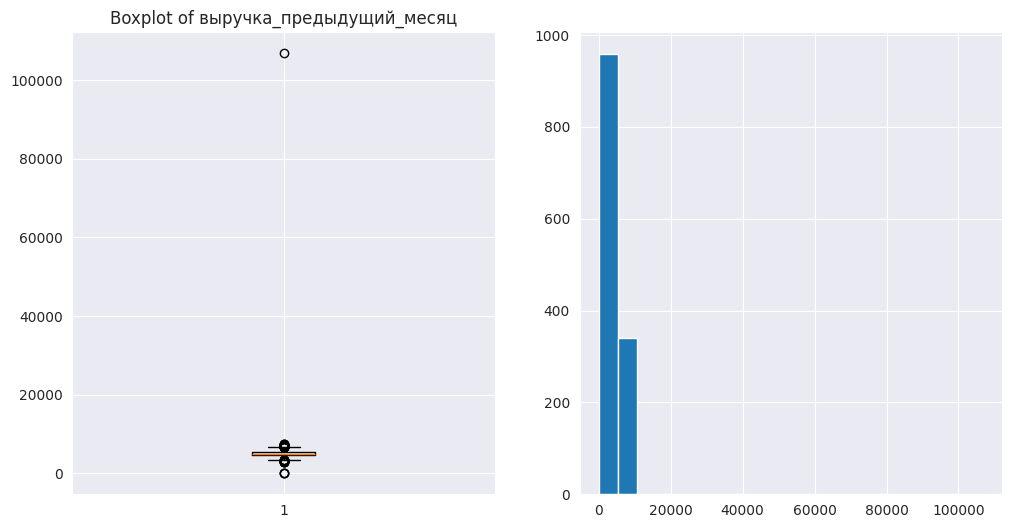

<Figure size 800x600 with 0 Axes>

In [251]:

plotplot('выручка_текущий_месяц')

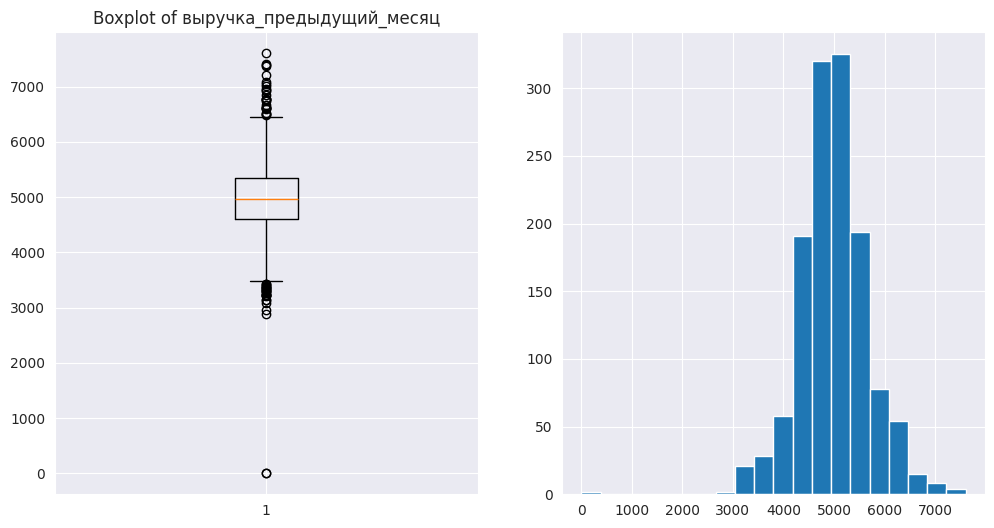

<Figure size 800x600 with 0 Axes>

In [252]:

plotplot('выручка_предыдущий_месяц')


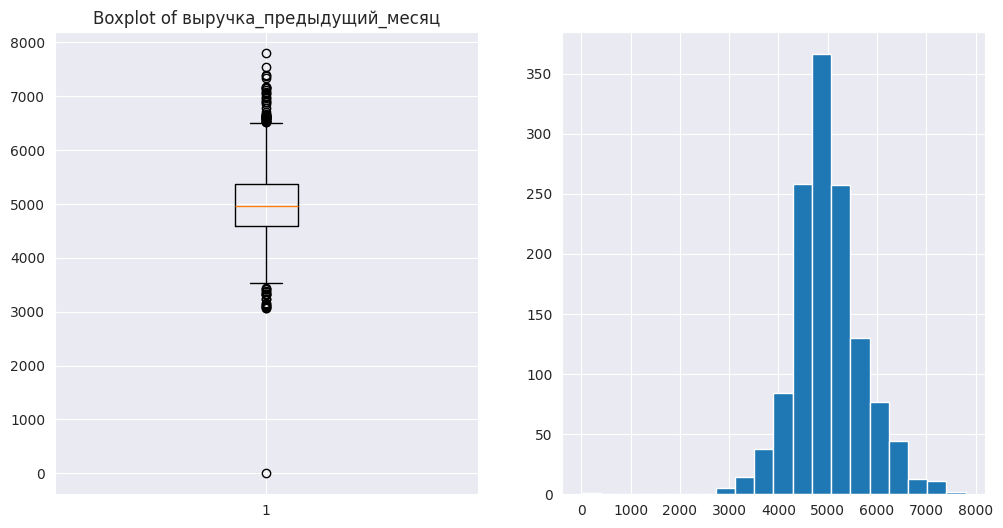

<Figure size 800x600 with 0 Axes>

In [253]:
plotplot('выручка_препредыдущий_месяц')

In [254]:
# outliers can be removed by quantile
k = dat2['выручка_текущий_месяц']
q1 = k.quantile(0.25)
q3 = k.quantile(0.75)


def rab(x):
    bound = x['выручка_текущий_месяц']
    if (bound > q1) and (bound < q3):
        return bound
    return np.median(dat2[dat2['id'] == x['id']][
                         ['выручка_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц']].values)


dat2['выручка_текущий_месяц'] = dat2.apply(rab, axis=1)




In [255]:
dat2.groupby('популярная_категория').sum()[
    ['выручка_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц']]

,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц
популярная_категория,,,
Домашний текстиль,1270474.4,1264264.0,1287621.7
Косметика и аксессуары,1130349.7,1144539.0,1127034.7
Кухонная посуда,708233.1,713144.3,719331.5
Мелкая бытовая техника и электроника,876622.4,881102.5,880524.1
Техника для красоты и здоровья,894206.9,882340.6,896852.7
Товары для детей,1615191.5,1596424.4,1600599.3


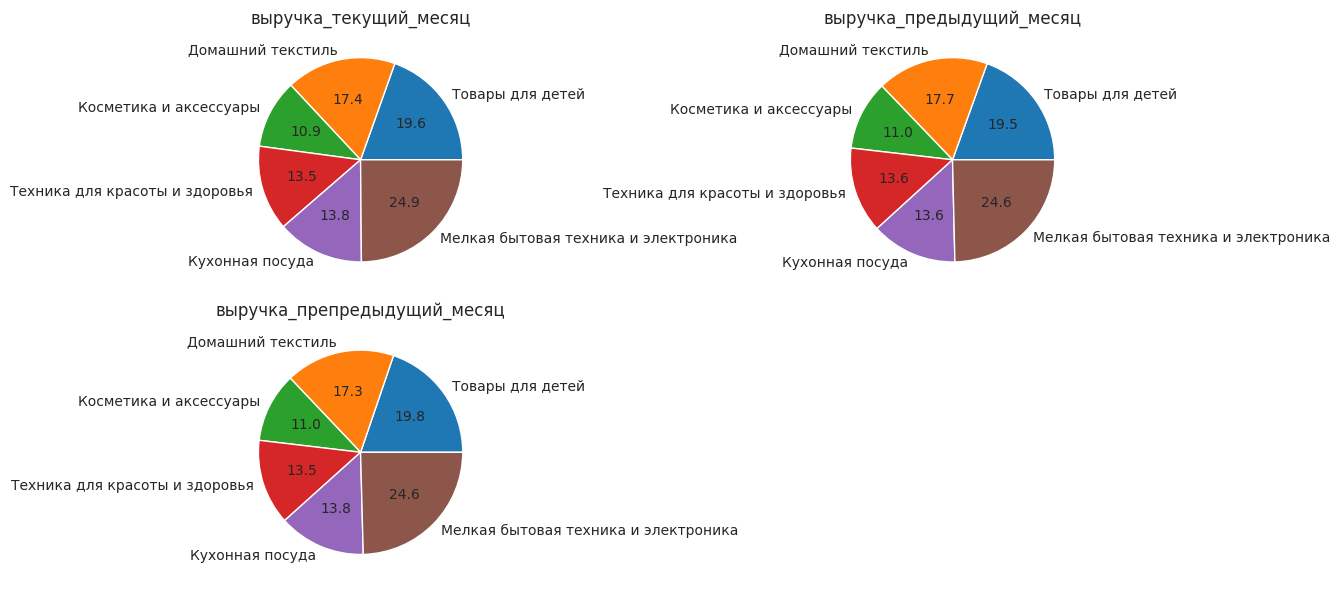

In [256]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0][0].pie(dat2.groupby(['популярная_категория'])[['выручка_текущий_месяц']].sum()['выручка_текущий_месяц'],
               autopct='%1.1f',
               labels=dat2['популярная_категория'].unique())
axes[0][0].set_title('выручка_текущий_месяц')
axes[0][1].pie(dat2.groupby(['популярная_категория'])[['выручка_предыдущий_месяц']].sum()['выручка_предыдущий_месяц'],
               autopct='%1.1f',
               labels=dat2['популярная_категория'].unique())
axes[0][1].set_title('выручка_предыдущий_месяц')
axes[1][0].pie(
    dat2.groupby(['популярная_категория'])[['выручка_препредыдущий_месяц']].sum()['выручка_препредыдущий_месяц'],
    autopct='%1.1f',
    labels=dat2['популярная_категория'].unique())
axes[1][0].set_title('выручка_препредыдущий_месяц')
fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

In [257]:
import itertools
from scipy.stats import pearsonr, spearmanr

g = ['минут_текущий', "минут_предыдущий", 'выручка_текущий_месяц', 'выручка_предыдущий_месяц',
     'выручка_препредыдущий_месяц', 'прибыль', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
     'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
     'страниц_за_визит']


def norm(a1, a2):
    stat, p = shapiro(dat2[a1])
    stat2, p2 = shapiro(dat2[a2])
    return p > 0.05 and p2 > 0.05


def check(a1, a2):
    if norm(a1, a2):
        
        corr1 = pearsonr(dat2[a1], dat2[a2])
        return abs(corr1[1])
    else:
        corr1 = spearmanr(dat2[a1], dat2[a2])
        return abs(corr1[1])


kek = dict()
for i in itertools.combinations(g, 2):
    kek[i[0] + " " + i[1]] = (check(i[0], i[1]))
    if i[0] == 'длительность' or i[1] == 'длительность':
        print(i[0] + " " + i[1], check(i[0], i[1]))
max_corr_pair = max(kek, key=kek.get)
max_corr_pvalue = kek[max_corr_pair]
print(max_corr_pair, max_corr_pvalue) # max correlation is with выручка в препредыдущем and длительность
# выручка в препредыдущем и в текущем месяцах зависели от длительности
# длительность не зависит от ошибок сервиса и среднего просмотра категорий за визит

минут_текущий длительность 0.24012723629746727
минут_предыдущий длительность 0.8963780972961881
выручка_текущий_месяц длительность 0.8691290340888417
выручка_предыдущий_месяц длительность 0.18323887407603243
выручка_препредыдущий_месяц длительность 0.9860224804742159
прибыль длительность 0.3246446015804092
маркет_актив_6_мес длительность 0.12353320766540211
маркет_актив_тек_мес длительность 7.365464411616216e-07
длительность акционные_покупки 0.1969913913814943
длительность средний_просмотр_категорий_за_визит 0.09725451675762584
длительность неоплаченные_продукты_штук_квартал 9.889674297757631e-05
длительность ошибка_сервиса 0.00020105809426873103
длительность страниц_за_визит 0.28163452676924716
выручка_препредыдущий_месяц длительность 0.9860224804742159


In [258]:
# check whether the data is normal
# Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.
stat, p = shapiro(dat2['прибыль'])
stat2, p2 = shapiro(dat2['вероятность'])


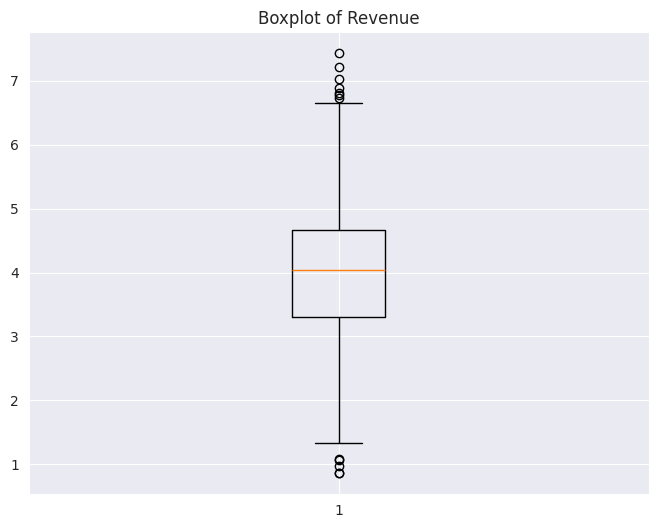

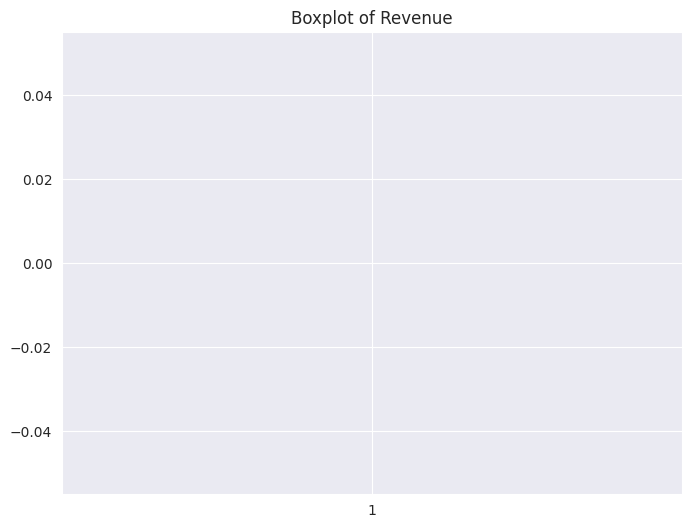

In [259]:
plt.figure(figsize=(8, 6))
plt.boxplot(dat2['прибыль'])
plt.title('Boxplot of Revenue')
plt.figure(figsize=(8, 6))
plt.boxplot(dat2['вероятность'])
plt.title('Boxplot of Revenue')
plt.show()

In [260]:
# not a normal distribution, so correlation can be measured by correlation of Spearman
dat2[['прибыль', 'вероятность']].corr()


,прибыль,вероятность
прибыль,1.000000,-0.030827
вероятность,-0.030827,1.000000


In [261]:
# take highest from 'вероятность' and 'выручка'
dat2[(dat2['вероятность'] > 0.9) & (dat2['прибыль'] > dat2['прибыль'].quantile(0.9))][
    ['прибыль', 'вероятность']].corr(method='spearman')

,прибыль,вероятность
прибыль,1.00000,-0.05365
вероятность,-0.05365,1.00000


In [262]:
# it stayed the same
g = ['минут_текущий', "минут_предыдущий", 'выручка_текущий_месяц', 'выручка_предыдущий_месяц',
     'выручка_препредыдущий_месяц', 'прибыль', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
     'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
     'страниц_за_визит']
# фокус на отдельных количественных данных
kek = (pd.DataFrame(dat2[g].corr(method='spearman')))
kek
# Conclusion:  correlation between this two ('вероятность' and 'прибыль') is too weak so can not to rely on them.

,минут_текущий,минут_предыдущий,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,прибыль,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
минут_текущий,1.000000,0.361183,-0.007143,0.013577,-0.016335,0.012344,0.245135,-0.024130,-0.032602,-0.288511,0.168250,-0.205174,0.123062,0.378929
минут_предыдущий,0.361183,1.000000,-0.032008,0.015426,-0.053945,0.014597,0.257196,-0.031027,0.003616,-0.315623,0.217721,-0.193829,0.145272,0.368607
выручка_текущий_месяц,-0.007143,-0.032008,1.000000,0.537340,0.593059,-0.006782,0.044033,-0.002147,0.004574,-0.048878,-0.030337,-0.019668,0.061474,0.027735
выручка_предыдущий_месяц,0.013577,0.015426,0.537340,1.000000,0.430600,-0.029365,0.047742,-0.008614,-0.036934,-0.046661,-0.008534,-0.046754,0.043151,0.021479
выручка_препредыдущий_месяц,-0.016335,-0.053945,0.593059,0.430600,1.000000,-0.013988,0.064032,-0.045085,-0.000486,-0.042792,-0.015323,-0.007782,0.029941,0.033874
прибыль,0.012344,0.014597,-0.006782,-0.029365,-0.013988,1.000000,-0.009908,-0.026052,0.027339,-0.037355,-0.040576,-0.003598,0.032962,-0.022439
маркет_актив_6_мес,0.245135,0.257196,0.044033,0.047742,0.064032,-0.009908,1.000000,0.060034,-0.042737,-0.275042,0.183511,-0.134096,0.039080,0.319911
маркет_актив_тек_мес,-0.024130,-0.031027,-0.002147,-0.008614,-0.045085,-0.026052,0.060034,1.000000,-0.136814,0.027148,-0.022552,0.060954,0.087050,-0.000658
длительность,-0.032602,0.003616,0.004574,-0.036934,-0.000486,0.027339,-0.042737,-0.136814,1.000000,0.035806,-0.046013,-0.107769,0.102935,-0.029883
акционные_покупки,-0.288511,-0.315623,-0.048878,-0.046661,-0.042792,-0.037355,-0.275042,0.027148,0.035806,1.000000,-0.205344,0.197513,-0.051411,-0.364669
